**This is a notebook for exploratory data analysis of the speech commands dataset which is released by TensorFlow.
**

Import the necessary modules.

In [7]:
import os
import numpy as np
import pandas as pd
from scipy import signal
from scipy.io import wavfile
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

Specify the input directory for the training data, noise data. Make lists of the words.

In [8]:
train_audio_dir = '../input/train/audio/'
noise_dir = '../input/train/audio/_background_noise_/'
train_words_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
noise_list = ['_background_noise_']
unknown_list = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
            'bed', 'bird', 'cat', 'dog', 'happy', 'house', 'marvin', 'sheila', 'tree', 'wow']

Turn the training information into a pandas DataFrame, which contains the file paths, file names, ids, categories, etc.

In [9]:
train_df_list = []
for word_id, word in enumerate(train_words_list):
    for file in os.listdir(train_audio_dir + word + '/'):
        train_df_list.append([train_audio_dir + word + '/' + file, word_id, word, word])
for file in os.listdir(noise_dir):
    if file.endswith('wav'):
        train_df_list.append([noise_dir + file, 10, 'silence', file[:-4]])
for word in unknown_list:
    for file in os.listdir(train_audio_dir + word + '/'):
        train_df_list.append([train_audio_dir + word + '/' + file, 11, 'unknown', word])
train_df = pd.DataFrame(train_df_list, columns = ['file', 'word_id', 'word', 'actual_word'])

The number of records in the training data.

In [10]:
train_df.shape

(64727, 4)

The head of the DataFrame.

In [11]:
train_df.head()

,file,word_id,word,actual_word
0,../input/train/audio/yes/b43de700_nohash_0.wav,0,yes,yes
1,../input/train/audio/yes/10ace7eb_nohash_0.wav,0,yes,yes
2,../input/train/audio/yes/25132942_nohash_2.wav,0,yes,yes
3,../input/train/audio/yes/3c257192_nohash_4.wav,0,yes,yes
4,../input/train/audio/yes/70a00e98_nohash_0.wav,0,yes,yes


Randomly select 9 audio files and display the raw wav file.

In [12]:
def sr_show_waveform(df, num_imgs=3):
    random_idx = np.random.choice(np.arange(0, df.shape[0]), num_imgs**2, replace=False)
    f, axarr = plt.subplots(nrows=num_imgs, ncols=num_imgs, figsize=(13, 13))
    for i in range(num_imgs):
        for j in range(num_imgs):
            idx = random_idx[i*num_imgs + j]
            path = df.iloc[idx, 0]
            _, test_sound  = wavfile.read(path)
            axarr[i, j].plot(test_sound)
            axarr[i, j].set_title(df.iloc[idx, 2] + ' : ' + df.iloc[idx, 3])
    plt.show()

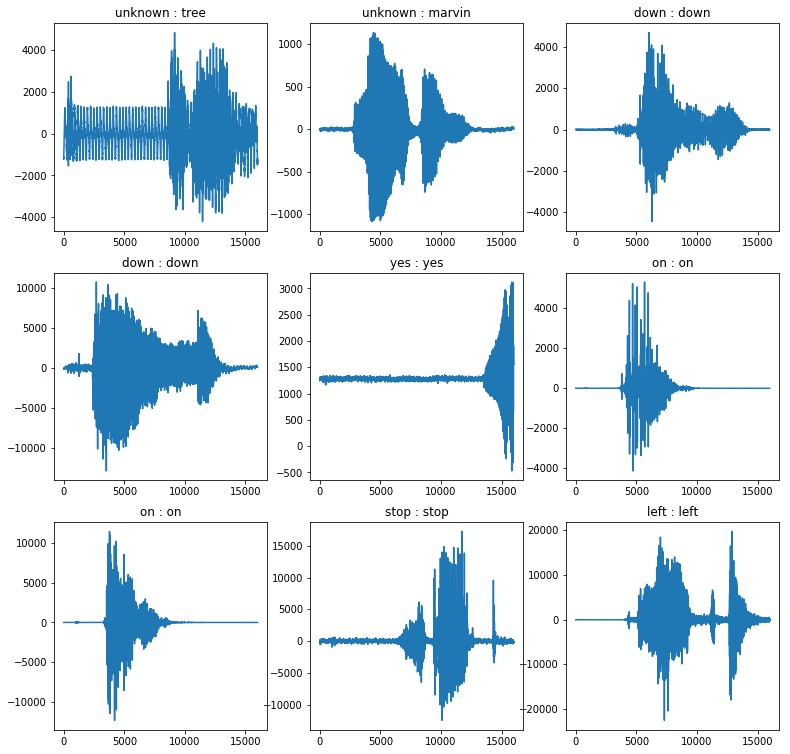

In [13]:
sr_show_waveform(train_df)

Define the function to get the spectrogram of the audio signal.

In [14]:
def sr_log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

Randomly select 9 audio files and display the spectrograms.

In [15]:
def sr_show_spectrogram(df, num_imgs=3):
    random_idx = np.random.choice(np.arange(0, df.shape[0]), num_imgs**2, replace=False)
    f, axarr = plt.subplots(nrows=num_imgs, ncols=num_imgs, figsize=(13, 13))
    for i in range(num_imgs):
        for j in range(num_imgs):
            idx = random_idx[i*num_imgs + j]
            path = df.iloc[idx, 0]
            samplerate, test_sound  = wavfile.read(path)
            _, spectrogram = sr_log_specgram(test_sound, samplerate)
            axarr[i, j].imshow(spectrogram.T, aspect='auto', origin='lower')
            axarr[i, j].set_title(df.iloc[idx, 2] + ' : ' + df.iloc[idx, 3])
    plt.show()

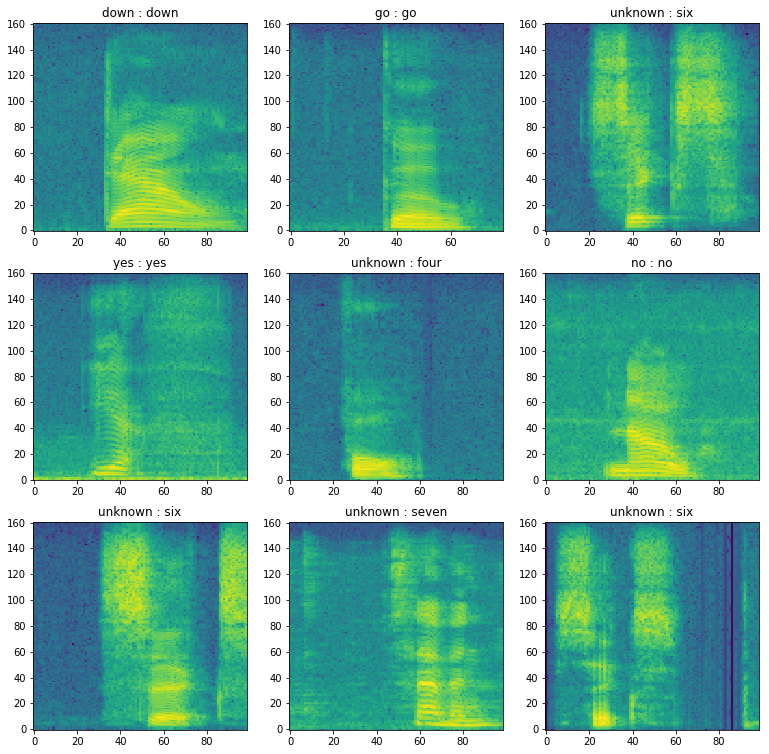

In [16]:
sr_show_spectrogram(train_df)

Randomly select 9 audio files and display the mel spectrograms.

In [17]:
def sr_show_melspectrogram(df, num_imgs=3):
    random_idx = np.random.choice(np.arange(0, df.shape[0]), num_imgs**2, replace=False)
    plt.figure(figsize=(40, 40))
    plt.rc('font', size=24)
    for i in range(num_imgs**2):
        idx = random_idx[i]
        path = df.iloc[idx, 0]
        samplerate, test_sound  = wavfile.read(path)
        S = librosa.feature.melspectrogram(test_sound, sr=samplerate, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)
        plt.subplot(num_imgs, num_imgs, i + 1)
        librosa.display.specshow(log_S, sr=samplerate)
        plt.title(df.iloc[idx, 2] + ' : ' + df.iloc[idx, 3])
    plt.show()

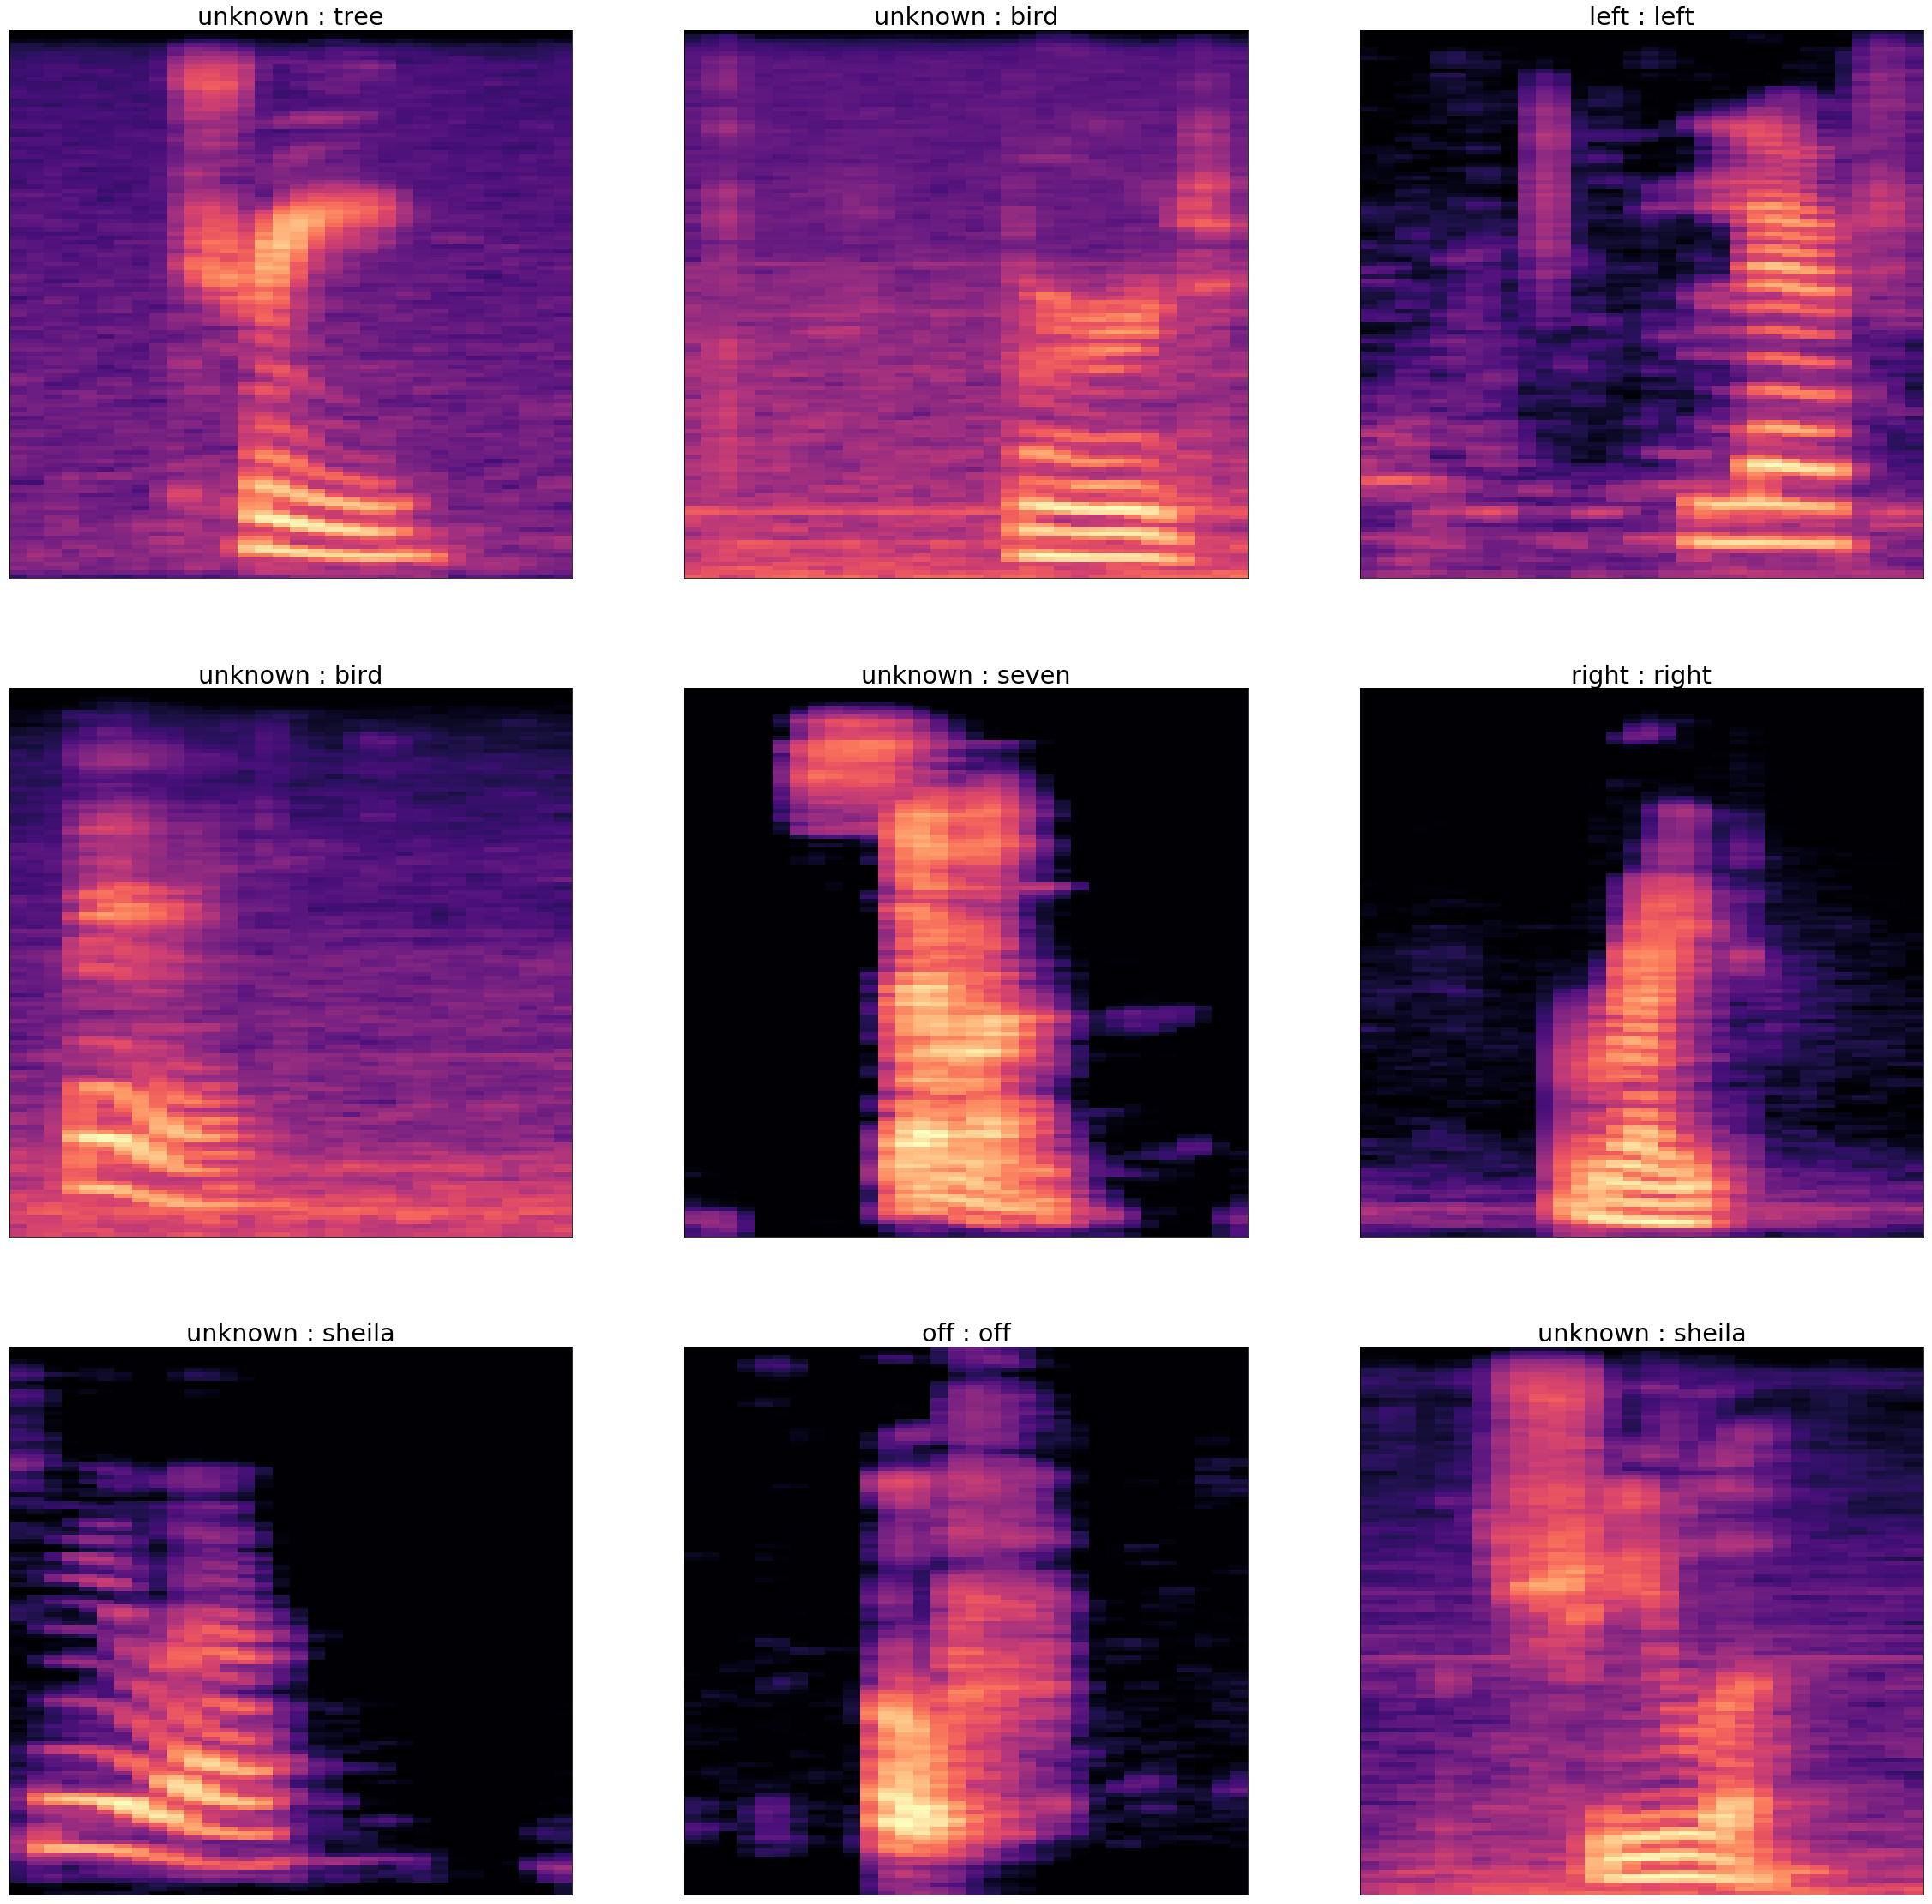

In [18]:
sr_show_melspectrogram(train_df)

To be continued...